This Notebook will explore the effects single qubit gates have on qubits, comparing the theory to the effects single qubit gates have on an actual qubit in a quantum computer

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt

In [3]:
# Setting up registers and circuits
# One qubit per gate tested
qreg_q = QuantumRegister(7, 'q')
creg_c = ClassicalRegister(7, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

In [4]:
# Preparing the gates
gates = [
    circuit.id,
    circuit.x,
    circuit.y,
    circuit.z,
    circuit.s,
    circuit.t,
    circuit.h
]

# Applying each gate to its corresponding qubit
for i, gate in enumerate(gates):
    gate(qreg_q[i])

circuit.measure(qreg_q, creg_c)
print(circuit)

# Function to visualise bloch spheres
def visualise_bloch_spheres(bloch_1, bloch_2):
    # Create a 1x2 subplot
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')

    # Plot on individual axes
    plot_bloch_vector(bloch_1, title="Before", ax=ax1, font_size=16)
    plot_bloch_vector(bloch_2, title="After", ax=ax2, font_size=16)

    plt.tight_layout()
    plt.show()

     ┌───┐┌─┐                  
q_0: ┤ I ├┤M├──────────────────
     ├───┤└╥┘┌─┐               
q_1: ┤ X ├─╫─┤M├───────────────
     ├───┤ ║ └╥┘┌─┐            
q_2: ┤ Y ├─╫──╫─┤M├────────────
     ├───┤ ║  ║ └╥┘┌─┐         
q_3: ┤ Z ├─╫──╫──╫─┤M├─────────
     ├───┤ ║  ║  ║ └╥┘┌─┐      
q_4: ┤ S ├─╫──╫──╫──╫─┤M├──────
     ├───┤ ║  ║  ║  ║ └╥┘┌─┐   
q_5: ┤ T ├─╫──╫──╫──╫──╫─┤M├───
     ├───┤ ║  ║  ║  ║  ║ └╥┘┌─┐
q_6: ┤ H ├─╫──╫──╫──╫──╫──╫─┤M├
     └───┘ ║  ║  ║  ║  ║  ║ └╥┘
c: 7/══════╩══╩══╩══╩══╩══╩══╩═
           0  1  2  3  4  5  6 


## Identity Gate:

No change expected\
On the Z-Basis:
$$
I|0\rangle -\rangle |0\rangle
$$
$$
I|1\rangle -\rangle |1\rangle
$$

The matrix representation of the I Gate is:
$$
I = \begin{bmatrix} 1&0 \\\ 0&1 \end{bmatrix}
$$

$$
I|0\rangle = \begin{bmatrix} 1&0 \\\ 0&1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}
$$

$$
I|1\rangle = \begin{bmatrix} 1&0 \\\ 0&1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}
$$

As a result, we would expect nothing to change.

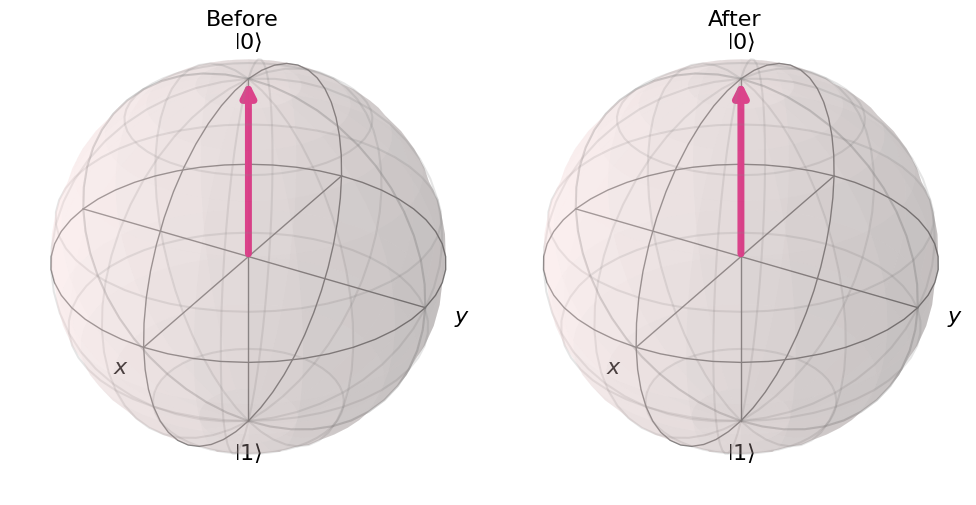

In [5]:
# Define vectors
bloch_1 = [0, 0, 1]
bloch_2 = [0, 0, 1]

visualise_bloch_spheres(bloch_1, bloch_2)

## Pauli X Gate:

A rotation of 180° about the X-axis\
On the Z-Basis:
$$
X|0\rangle -\rangle |1\rangle
$$
$$
X|1\rangle -\rangle |0\rangle
$$

The matrix representation of the X Gate is:
$$
X = \begin{bmatrix} 0&1 \\\ 1&0 \end{bmatrix}
$$

$$
X|0\rangle = \begin{bmatrix} 0&1 \\\ 1&0 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}
$$

$$
X|1\rangle = \begin{bmatrix} 0&1 \\\ 1&0 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}
$$

As a result, we would expect:
$$
0\rangle \rightarrow |1\rangle \ and \ |1\rangle \rightarrow |0\rangle
$$

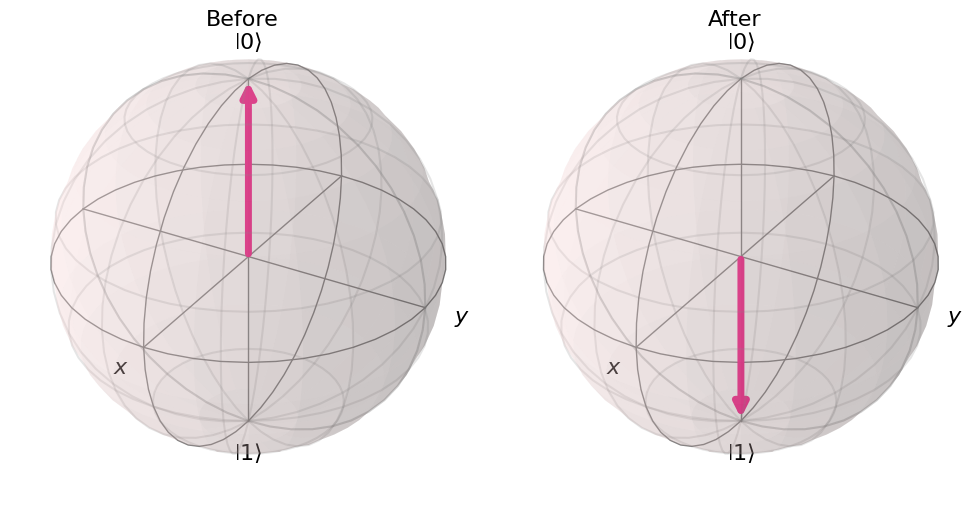

In [5]:
# Define vectors
bloch_1 = [0, 0, 1]
bloch_2 = [0, 0, -1]

visualise_bloch_spheres(bloch_1, bloch_2)

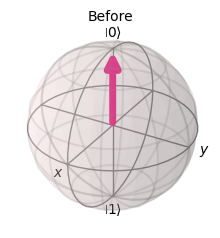

In [15]:
plot_bloch_vector([0,0,1], figsize=(2,2), title="Before")

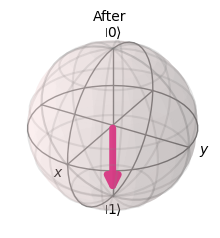

In [17]:
plot_bloch_vector([0,0,-1], figsize=(2,2), title="After")

## Pauli Y Gate:

A rotation of 180° about the Y-axis\
On the Z-Basis:
$$
Y|0\rangle -\rangle i|1\rangle
$$
$$
Y|1\rangle -\rangle -i|0\rangle
$$

The matrix representation of the X Gate is:
$$
Y = \begin{bmatrix} 0&-i \\\ i&0 \end{bmatrix}
$$

$$
Y|0\rangle = \begin{bmatrix} 0&-i \\\ i&0 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ i \end{bmatrix}
$$

$$
Y|1\rangle = \begin{bmatrix} 0&-i \\\ i&0 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} -i \\ 0 \end{bmatrix}
$$

As a result, we would expect:
$$
0\rangle \rightarrow i|1\rangle \ and \ |1\rangle \rightarrow -i|0\rangle
$$

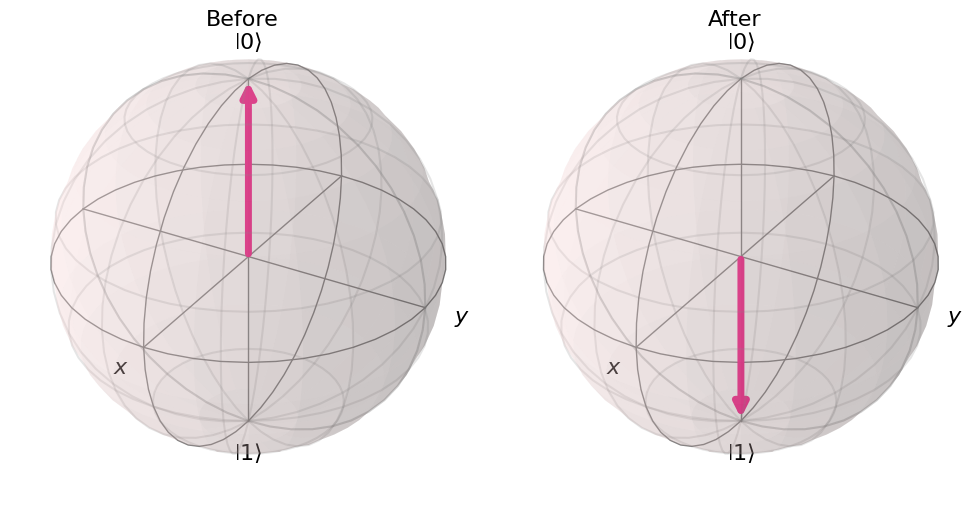

In [8]:
# Define vectors
bloch_1 = [0, 0, 1]
bloch_2 = [0, 0, -1]

visualise_bloch_spheres(bloch_1, bloch_2)

## Pauli Z Gate:

A rotation of 180° about the Z-axis\
On the Z-Basis:
$$
Z|0\rangle -\rangle |0\rangle
$$
$$
Z|1\rangle -\rangle -|1\rangle
$$

The matrix representation of the X Gate is:
$$
Z = \begin{bmatrix} 1&0 \\\ 0&-1 \end{bmatrix}
$$

$$
Z|0\rangle = \begin{bmatrix} 1&0 \\\ 0&-1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}
$$

$$
Z|1\rangle = \begin{bmatrix} 1&0 \\\ 0&-1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 \\ -1 \end{bmatrix}
$$

As a result, we would expect:
$$
0\rangle \rightarrow |0\rangle \ and \ |1\rangle \rightarrow -|1\rangle
$$

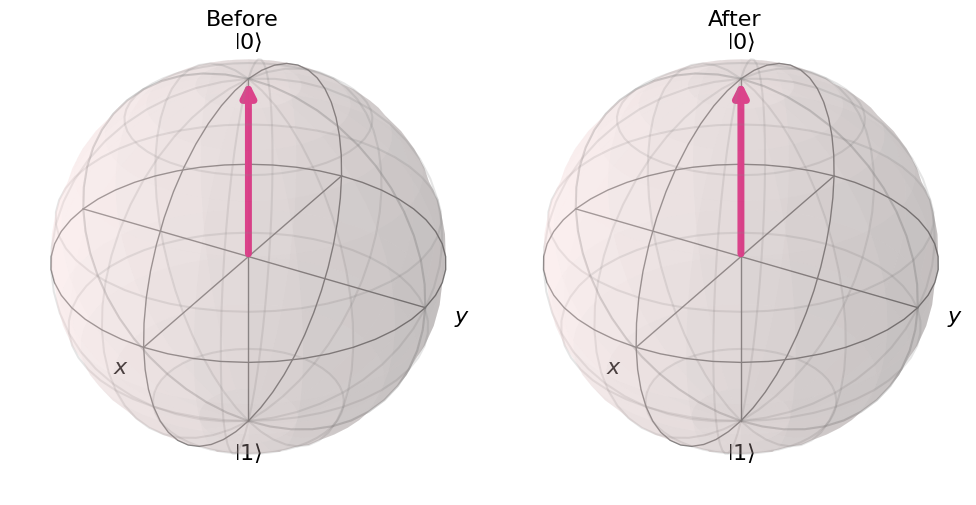

In [9]:
# Define vectors
bloch_1 = [0, 0, 1]
bloch_2 = [0, 0, 1]

visualise_bloch_spheres(bloch_1, bloch_2)

## Identity Gate:

No change expected\
On the Z-Basis:
$$
I|0\rangle -\rangle |0\rangle
$$
$$
I|1\rangle -\rangle |1\rangle
$$

## Pauli X Gate:

A rotation of 180° about the X-axis\
On the Z-Basis:
$$
X|0\rangle -\rangle |1\rangle
$$
$$
X|1\rangle -\rangle |0\rangle
$$

## Pauli Y Gate:

A rotation of 180° about the Y-axis\
On the Z-Basis:
$$
Y|0\rangle -\rangle i|1\rangle
$$
$$
Y|1\rangle -\rangle -i|0\rangle
$$

## Pauli Z Gate:

A rotation of 180° about the Z-axis\
On the Z-Basis:
$$
Z|0\rangle -\rangle |0\rangle
$$
$$
Z|1\rangle -\rangle -|1\rangle
$$

## Phase Gate:

The Square root of the Z gate (Sˆ2 = Z, Sˆ4 = I)\
A rotation of 90° about the Z-axis\
On the Z-Basis:
$$
S|0\rangle -\rangle |0\rangle
$$
$$
S|1\rangle -\rangle i|1\rangle
$$

## T (pie/6) Gate:

The Square root of the S gate (Tˆ2 = S, Tˆ4 = Z)\
A rotation of 45° about the Z-axis\
On the Z-Basis:
$$
T|0\rangle \rightarrow |0\rangle
$$
$$
T|1\rangle \rightarrow e^{i\frac{\pi}{4}}|1\rangle
$$

## H (Hadamard) Gate:

A rotation of 180° about the X+Z-axis (Hˆ2 = I)\
On the Z-Basis:

$$
H|0\rangle \rightarrow \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = |+\rangle
$$
$$
H|1\rangle \rightarrow \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = |-\rangle
$$